In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pip install seaborn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

<ipython-input-3-248ef695f9f7>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df_data = pd.read_csv('my course-used carslv1.csv')

In [5]:
df_data

,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# Coulmns Rename the used cars csv file

In [6]:
headrs = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print(headrs)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [7]:
df_data.columns = headrs
df_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# Cleaning Data

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [9]:
df_data.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# Filling NA with mean of each columns contains NA (numric columns)

In [10]:
mean_normalized_losses = df_data['normalized-losses'].mean()
mean_normalized_bore  = df_data['bore'].mean()
mean_horsepower  = df_data['horsepower'].mean()
mean_peak_rpm  = df_data['peak-rpm'].mean()
mean_stroke  = df_data['stroke'].mean()
mean_price  = df_data['price'].mean()
df_data['normalized-losses'] = df_data['normalized-losses'].fillna(mean_normalized_losses)
df_data['bore'] = df_data['bore'].fillna(mean_normalized_bore)
df_data['horsepower'] = df_data['horsepower'].fillna(mean_horsepower)
df_data['peak-rpm'] = df_data['peak-rpm'].fillna(mean_peak_rpm)
df_data['stroke'] = df_data['stroke'].fillna(mean_stroke)
df_data['price'] = df_data['price'].fillna(mean_price)

# Checking the Numric Data

In [11]:
df_data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Cleaning Obj Data : Since it 2 rows only so we'll drop it

In [12]:
df_data.dropna( axis = 0 , inplace =True)

# Expolre cleaned Data

In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  202 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non-null

In [14]:
df_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
201,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
202,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# Used Cars csv file EDA

In [15]:
df_data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.826733,121.871287,98.831683,174.139604,65.924257,53.755941,2557.965347,127.059406,3.330229,3.256996,10.098614,104.432899,5126.494951,25.193069,30.717822,13240.632475
std,1.243762,31.863566,6.013061,12.364039,2.151791,2.423638,523.854860,41.900456,0.271824,0.313019,3.897109,39.708092,478.542306,6.539383,6.886758,7918.562586
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.425000,64.125000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7778.250000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10470.000000
75%,2.000000,137.000000,102.400000,183.400000,66.900000,55.500000,2947.750000,144.000000,3.587500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
df_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0


# Analyze Num of Used Cars Per Brand Name

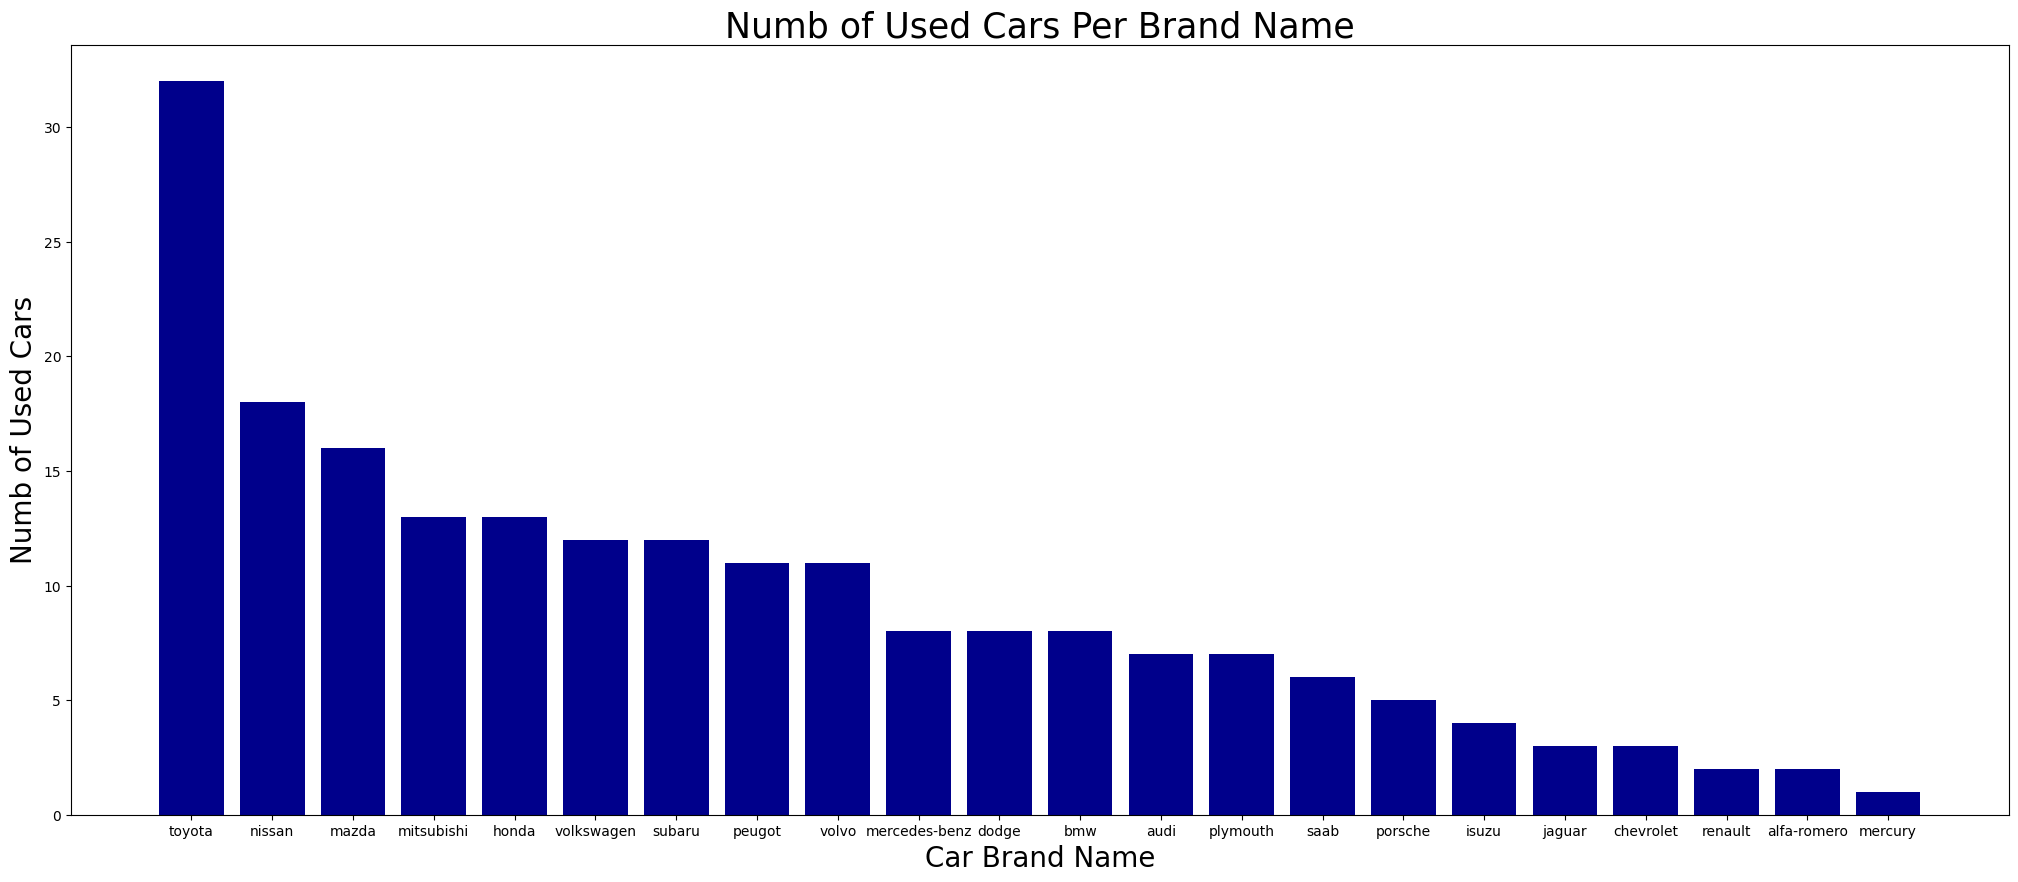

In [17]:
car_make=df_data['make'].value_counts()
x = car_make.index
y = car_make.values
plt.figure(figsize=(25, 10))
plt.bar(x, y, color = 'darkblue' )
plt.title('Numb of Used Cars Per Brand Name',size = 25)
plt.xlabel('Car Brand Name',size = 20)
plt.ylabel('Numb of Used Cars',size = 20)
plt.show()

In [18]:
# Comment : Toyota is the highset owend used cars

# Analyze Num of Used Cars Per Car Fuel Type

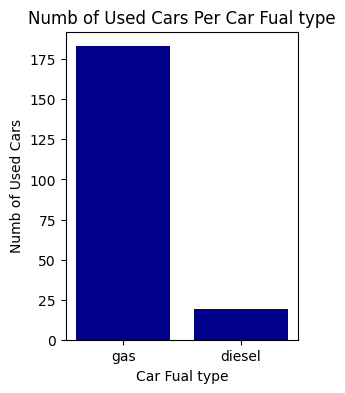

In [19]:
fual_type=df_data['fuel-type'].value_counts()
x = fual_type.index
y = fual_type.values
plt.figure(figsize=(3, 4))
plt.bar(x, y, color = 'darkblue')
plt.title('Numb of Used Cars Per Car Fual type')
plt.xlabel('Car Fual type')
plt.ylabel('Numb of Used Cars')
plt.show()

In [20]:
# Comment : Car Fual type Gas is the highset owend used cars

# Analyze Num of Used Cars Per Car Aspiration

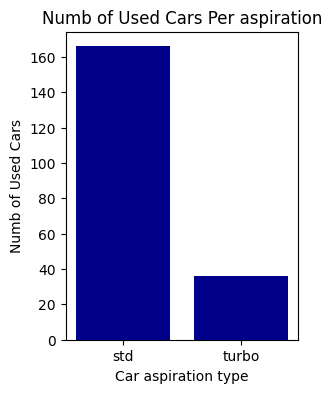

In [21]:
aspiration=df_data['aspiration'].value_counts()
x = aspiration.index
y = aspiration.values
plt.figure(figsize=(3,4))
plt.bar(x, y, color = 'darkblue')
plt.title('Numb of Used Cars Per aspiration')
plt.xlabel('Car aspiration type')
plt.ylabel('Numb of Used Cars')
plt.show()

In [22]:
# Comment : Car aspiration type std is the highset owend used cars

# Analyze Num of Used Cars Per Car Num of doors

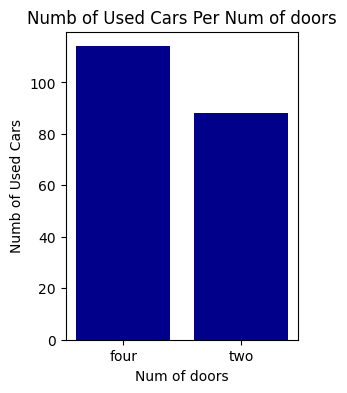

In [23]:
num_of_doors=df_data['num-of-doors'].value_counts()
x = num_of_doors.index
y = num_of_doors.values
plt.figure(figsize=(3,4))
plt.bar(x, y, color = 'darkblue')
plt.title('Numb of Used Cars Per Num of doors')
plt.xlabel('Num of doors')
plt.ylabel('Numb of Used Cars')
plt.show()

In [24]:
# Comment : Car Num of doors four is the highset owend used cars

# Analyze Num of Used Cars Per Car body style

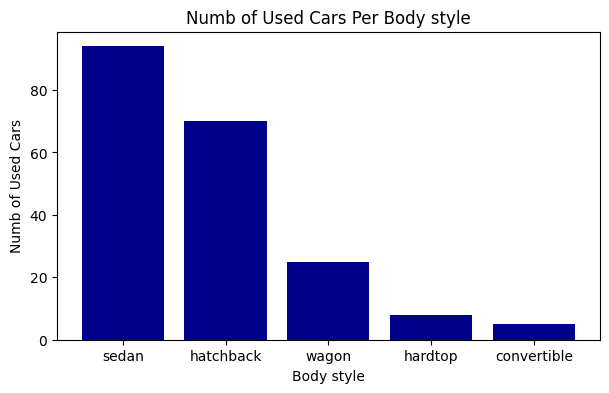

In [25]:
body_style=df_data['body-style'].value_counts()
x = body_style.index
y = body_style.values
plt.figure(figsize=(7,4))
plt.bar(x, y, color = 'darkblue')
plt.title('Numb of Used Cars Per Body style')
plt.xlabel('Body style')
plt.ylabel('Numb of Used Cars')
plt.show()

In [26]:
# Comment : Cars Per Body style sedan is the highset owend used cars

In [27]:
df_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Analyze Numb of Used Cars Per Car Engine type

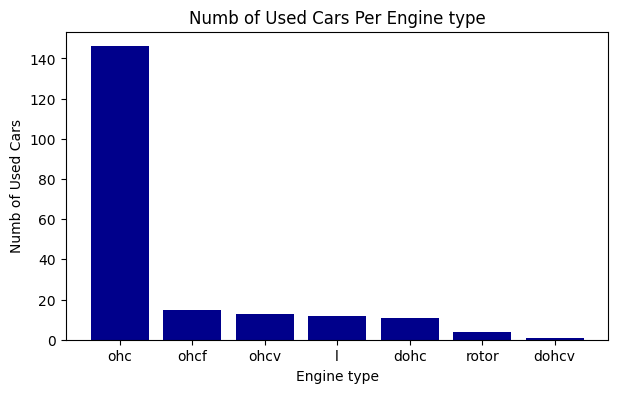

In [28]:
body_style=df_data['engine-type'].value_counts()
x = body_style.index
y = body_style.values
plt.figure(figsize=(7,4))
plt.bar(x, y, color = 'darkblue')
plt.title('Numb of Used Cars Per Engine type')
plt.xlabel('Engine type')
plt.ylabel('Numb of Used Cars')
plt.show()

In [29]:
# Comment : Cars Per Engine type OHC is the highset owend used cars

# Analyze Numb of Used Cars Per Car Num of cylinders

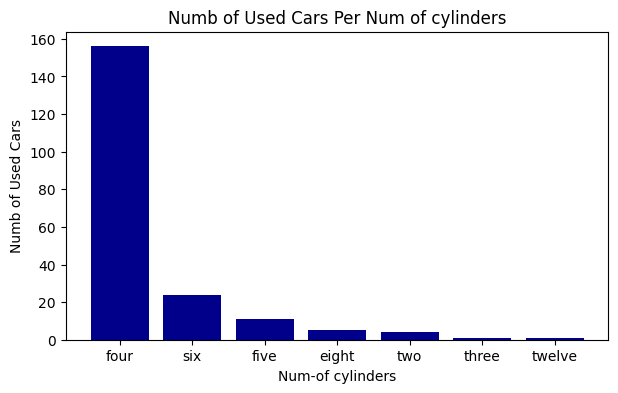

In [30]:
body_style=df_data['num-of-cylinders'].value_counts()
x = body_style.index
y = body_style.values
plt.figure(figsize=(7,4))
plt.bar(x, y, color = 'darkblue')
plt.title('Numb of Used Cars Per Num of cylinders')
plt.xlabel('Num-of cylinders')
plt.ylabel('Numb of Used Cars')
plt.show()

In [31]:
# Comment : Cars Per Num of cylinders FOUR is the highset owend used cars

In [32]:
#Summery Of anaylsis according this sample above :
#1-pepole prefer to own toyota
#2-pepole prefer to own cars that fuel type is gas
#3-pepole prefer to own the std cars more than turbo cars
#4-pepole prefer to own the 4 doors cars more than 2 doors cars
#5-pepole prefer to own sedan cars
#6-pepole prefer to own  Engine type OHC
#7-pepole prefer to own four cylinders cars

# Now Looking to the AVG price Per used Cars in some aspect

In [33]:
gp_reqdata = df_data[['make', 'fuel-type', 'aspiration', 'num-of-doors','body-style', 'drive-wheels','price']]
data_grouped = gp_reqdata.groupby(['make', 'fuel-type', 'aspiration', 'num-of-doors','body-style', 'drive-wheels'],as_index = False).mean()

In [36]:
gp_reqdata = df_data[['make', 'fuel-type', 'aspiration', 'num-of-doors','body-style',
'drive-wheels','engine-type','num-of-cylinders','price']]
data_grouped = gp_reqdata.groupby(['make', 'fuel-type', 'aspiration', 'num-of-doors',
'body-style', 'drive-wheels','engine-type','num-of-cylinders'],as_index = False).mean()

# Analyze Price Avg Per Car Barands

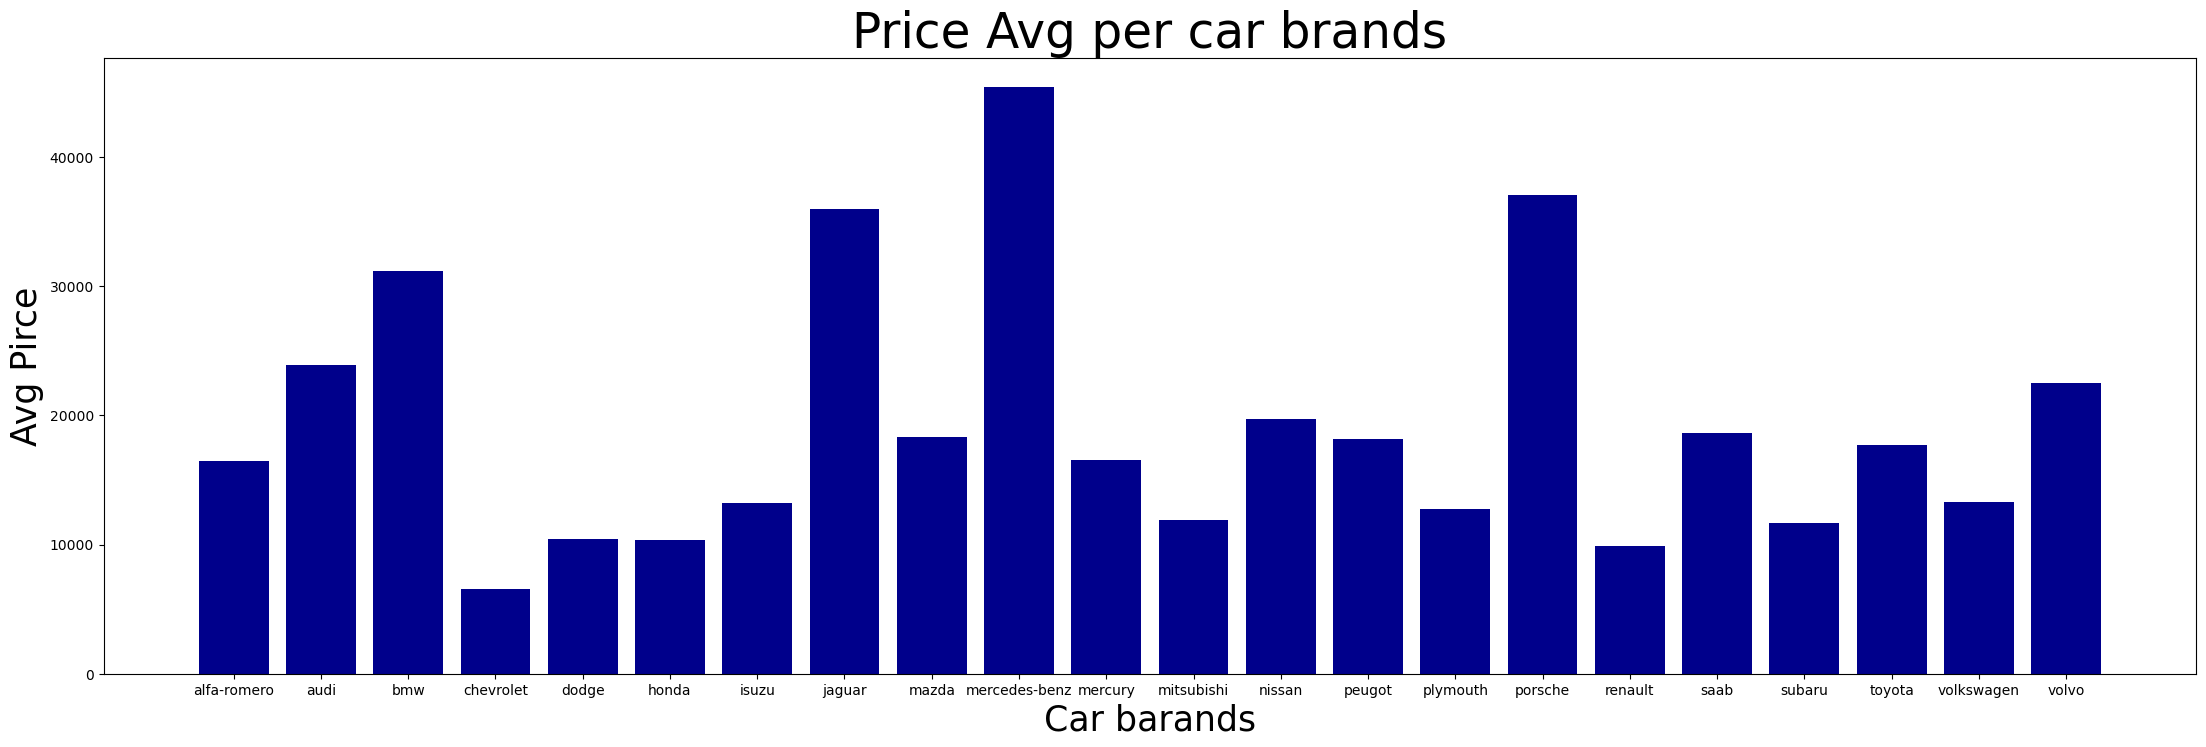

In [37]:
x = data_grouped['make']
y = data_grouped['price']
plt.figure(figsize=(27,8))
plt.bar(x, y, color = 'darkblue')
plt.title('Price Avg per car brands', size = 35)
plt.xlabel('Car barands', size = 25)
plt.ylabel('Avg Pirce', size = 25)
plt.show()


In [ ]:
# the cheapest used car brand per Avg Price is chevorlet

# Analyze Price Avg Per Car aspiration

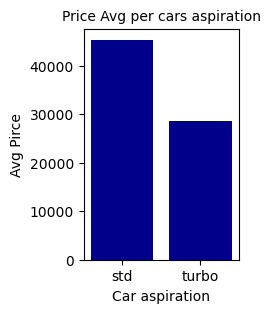

In [38]:
x = data_grouped['aspiration']
y = data_grouped['price']
plt.figure(figsize=(2,3))
plt.bar(x, y, color = 'darkblue')
plt.title('Price Avg per cars aspiration', size = 10)
plt.xlabel('Car aspiration', size = 10)
plt.ylabel('Avg Pirce', size = 10)
plt.show()

In [ ]:
# the cheapest used car aspiration per Avg Price is std 

# Analyze Price Avg Per Num-of-doors

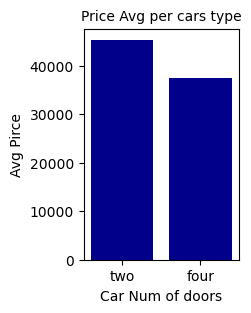

In [39]:
x = data_grouped['num-of-doors']
y = data_grouped['price']
plt.figure(figsize=(2,3))
plt.bar(x, y, color = 'darkblue')
plt.title('Price Avg per cars type', size = 10)
plt.xlabel('Car Num of doors', size = 10)
plt.ylabel('Avg Pirce', size = 10)
plt.show()

In [ ]:
# the cheapest used car typr per Avg Price is the  four door cars 

# Analyze Price Avg Per body-style

# Analyze Price Avg Per Engine-type

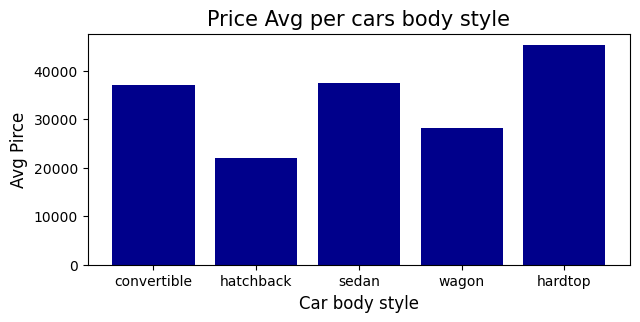

In [40]:
x = data_grouped['body-style']
y = data_grouped['price']
plt.figure(figsize=(7,3))
plt.bar(x, y, color = 'darkblue')
plt.title('Price Avg per cars body style', size = 15)
plt.xlabel('Car body style', size = 12)
plt.ylabel('Avg Pirce', size = 12)
plt.show()

In [ ]:
# the cheapest used car body style per Avg Price is the hatchback cars 
# the highest used car body style per Avg Price is the hardtop cars 


# Analyze Price Avg Per Num-of-cylinders

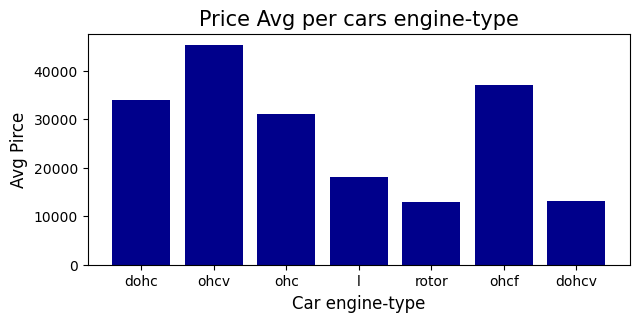

In [41]:
x = data_grouped['engine-type']
y = data_grouped['price']
plt.figure(figsize=(7,3))
plt.bar(x, y, color = 'darkblue')
plt.title('Price Avg per cars engine-type', size = 15)
plt.xlabel('Car engine-type', size = 12)
plt.ylabel('Avg Pirce', size = 12)
plt.show()

In [ ]:
# the cheapest used car engine type per Avg Price is the rotor  engine 
# the highest avg price per cars used engine type is OHCV Engine

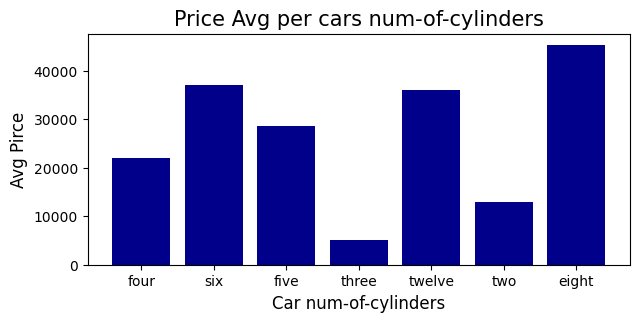

In [42]:
x = data_grouped['num-of-cylinders']
y = data_grouped['price']
plt.figure(figsize=(7,3))
plt.bar(x, y, color = 'darkblue')
plt.title('Price Avg per cars num-of-cylinders', size = 15)
plt.xlabel('Car num-of-cylinders', size = 12)
plt.ylabel('Avg Pirce', size = 12)
plt.show()

In [ ]:
# the cheapest used car num-of-cylinders per Avg Price is the three cylinders
# the highest avg cars num of cylinders is the eight cylinders cars

# Studying relationships between Used Cars csv file

In [43]:
Corr_data=df_data.corr( method='pearson' , numeric_only= True )

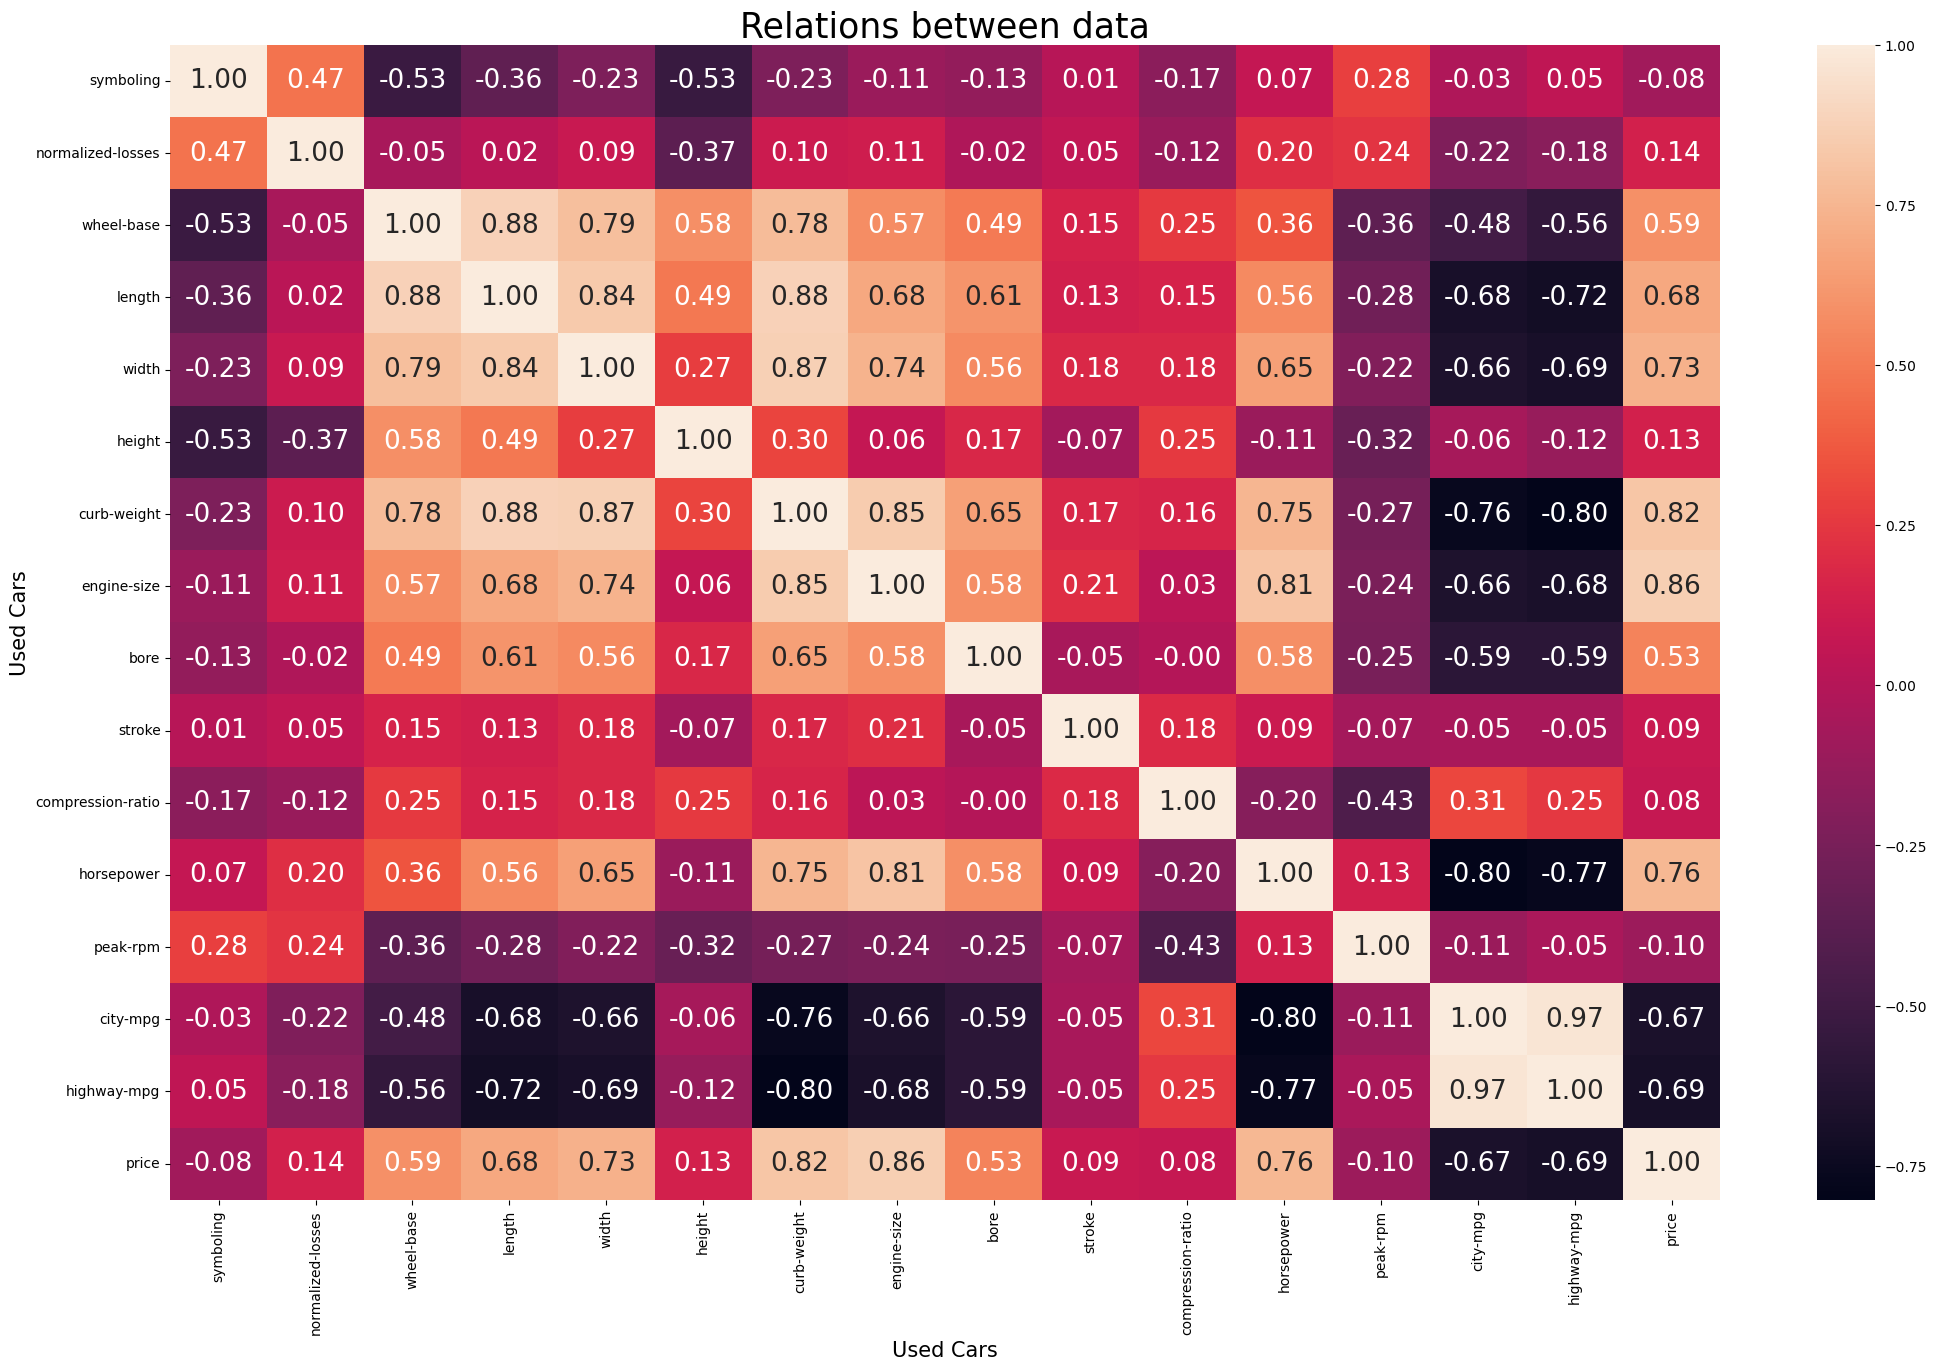

In [127]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(Corr_data, annot=True, annot_kws={"size":19}, fmt=".2f" ) 
plt.title('Relations between data',size = 25)
plt.xlabel('Used Cars',size = 15)
plt.ylabel('Used Cars',size = 15)
plt.show()

In [45]:
Corr_data['price']




symboling           -0.083922
normalized-losses    0.136770
wheel-base           0.586811
length               0.683882
width                0.730348
height               0.134308
curb-weight          0.820445
engine-size          0.861546
bore                 0.531928
stroke               0.085165
compression-ratio    0.076053
horsepower           0.759004
peak-rpm            -0.100574
city-mpg            -0.671349
highway-mpg         -0.694119
price                1.000000
Name: price, dtype: float64

# Relations between wheel-base and Price

<AxesSubplot:xlabel='wheel-base', ylabel='price'>

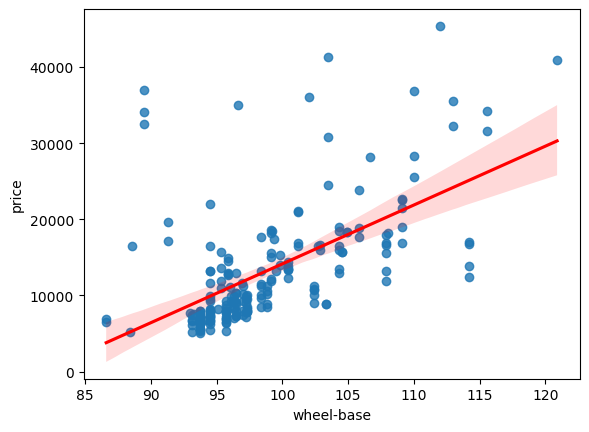

In [144]:

sns.regplot( x = df_data['wheel-base'],y = df_data['price'], data = df_data, line_kws=dict(color="r"))

# Relations between width and Price

<AxesSubplot:xlabel='width', ylabel='price'>

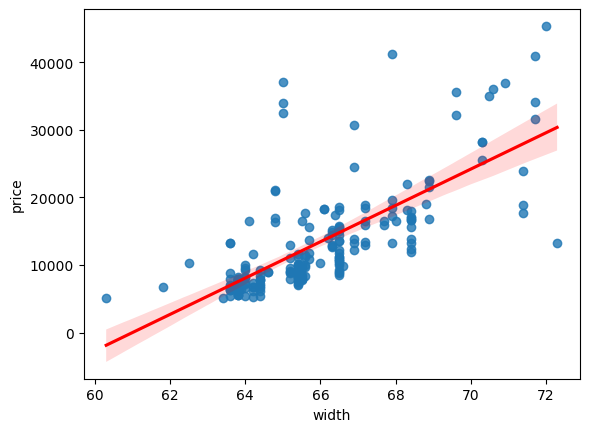

In [147]:
sns.regplot( x = df_data['width'],y = df_data['price'], data = df_data, line_kws=dict(color="r"))

# Relations between length and Price

<AxesSubplot:xlabel='length', ylabel='price'>

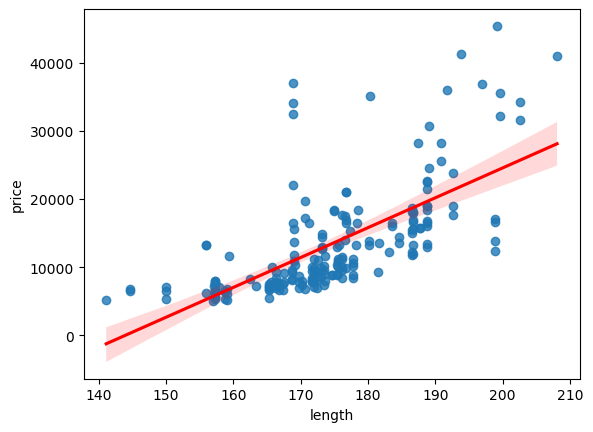

In [145]:
sns.regplot( x = df_data['length'],y = df_data['price'], data = df_data, line_kws=dict(color="r"))

# Relations between curb-weight and Price

<AxesSubplot:xlabel='curb-weight', ylabel='price'>

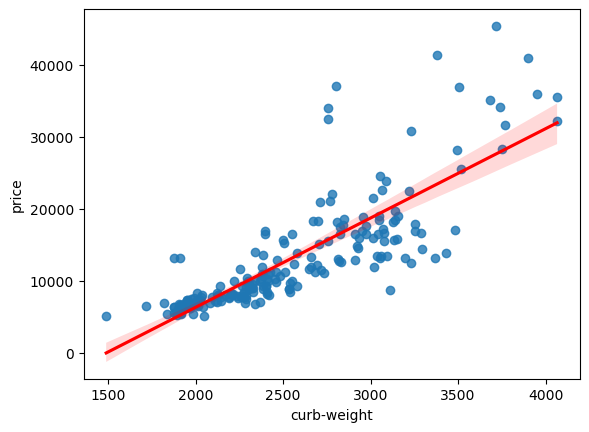

In [148]:
sns.regplot( x = df_data['curb-weight'],y = df_data['price'], data = df_data, line_kws=dict(color="r"))

# Relations between engine-size and Price

<AxesSubplot:xlabel='engine-size', ylabel='price'>

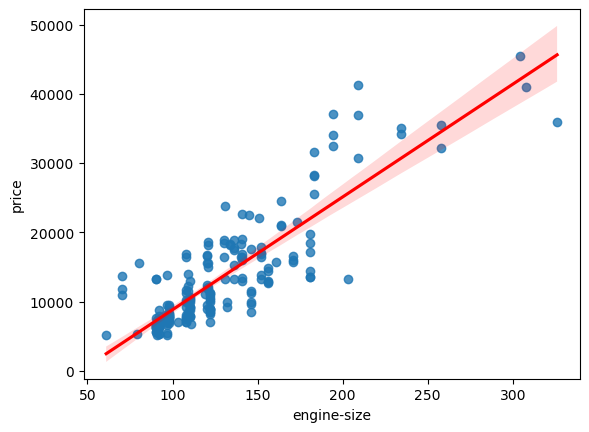

In [149]:
sns.regplot( x = df_data['engine-size'],y = df_data['price'], data = df_data, line_kws=dict(color="r"))

# Relations between bore and Price

<AxesSubplot:xlabel='bore', ylabel='price'>

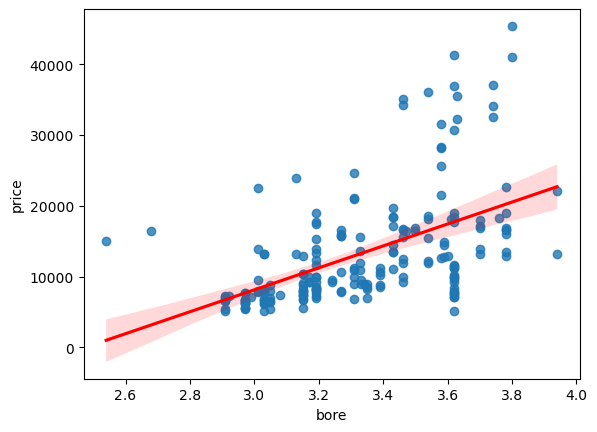

In [150]:
sns.regplot( x = df_data['bore'],y = df_data['price'], data = df_data, line_kws=dict(color="r"))

# Relations between horsepower and Price

<AxesSubplot:xlabel='horsepower', ylabel='price'>

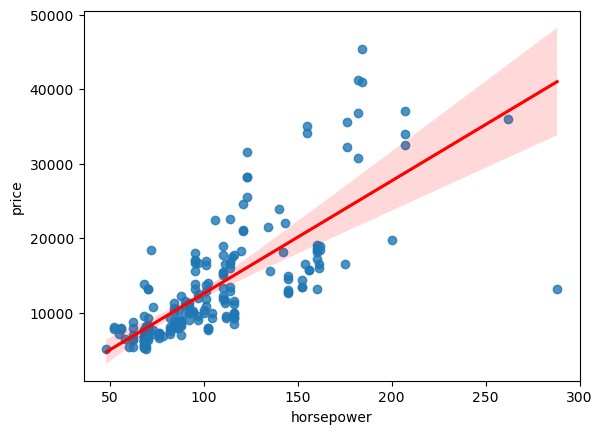

In [151]:
sns.regplot( x = df_data['horsepower'],y = df_data['price'], data = df_data, line_kws=dict(color="r"))

# Relations between city-mpg and Price

<AxesSubplot:xlabel='city-mpg', ylabel='price'>

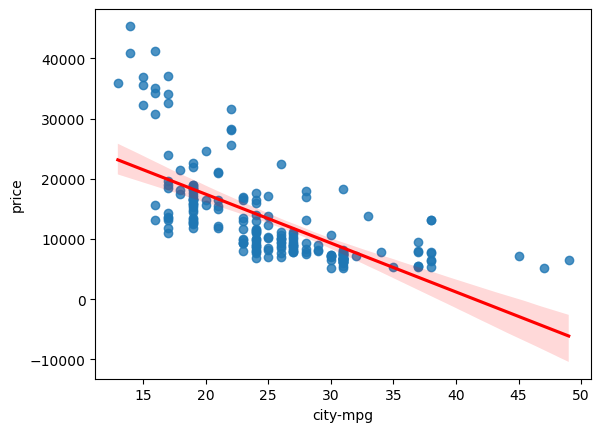

In [152]:
sns.regplot( x = df_data['city-mpg'],y = df_data['price'], data = df_data, line_kws=dict(color="r"))

# Relations between highway-mpg and Price

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

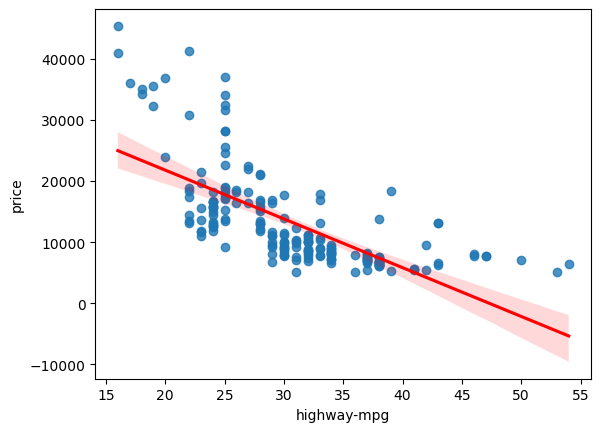

In [153]:
sns.regplot( x = df_data['highway-mpg'],y = df_data['price'], data = df_data, line_kws=dict(color="r"))

# Our Car price (y) which we will predict it affected by dependent variables (wheel-base , lengthwidth,  curb-weight, engine-size, bore,horsepower, city-mpg , highway-mpg)             


# Prepare a linear Regression model to predict the car price
# Model 1

In [100]:
x=df_data[[
       'wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg',  'highway-mpg']]
y = df_data[['price']]

In [101]:
Model1= LinearRegression()

In [102]:
 Model1.fit(x,y)

LinearRegression()

In [103]:
Model1.score(x,y)

0.7797250010301251

In [104]:
Model1.coef_

array([[   97.28533239,   -19.95505376,   203.20382077,     2.60364077,
          100.78181254, -1602.62203953,    26.2566441 ,    -7.55149084,
          -69.13362634]])

In [105]:
yhat= Model1.predict(x)

# Test our Model Actual price vs predicted price

<AxesSubplot:xlabel='price', ylabel='Density'>

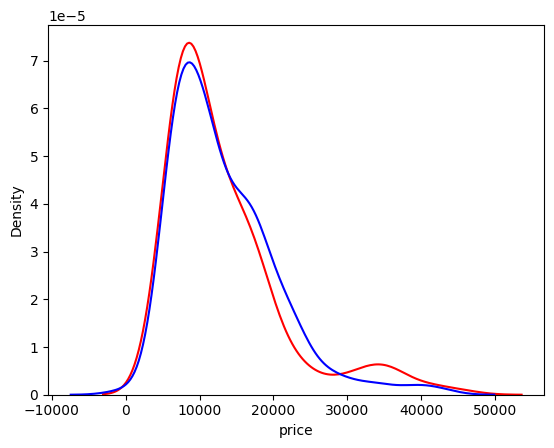

In [106]:
ax1=sns.distplot(df_data['price'], hist= False, color='r', label= ' Actual values')
sns.distplot(yhat ,hist= False, color='b', label= 'predicited value' , ax=ax1)

# Prepare a linear Regression model to predict the car price
# Model 2
# We will enhance our first model by adding some categoral data ( Make, Fuel type, doors type, body type, drive_wheels)

In [107]:
Make_dummy = pd.get_dummies(df_data['make'], dtype= 'float')
Make_dummy.drop('alfa-romero', axis=1, inplace = True)
df_data[['make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar',
       'make_mazda', 'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_renault', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo']] = Make_dummy

In [108]:
fuel_type_dummy = pd.get_dummies(df_data['fuel-type'], dtype= 'float')
fuel_type_dummy.drop('diesel', axis=1, inplace = True)
df_data[['gas']] = fuel_type_dummy

In [109]:
aspiration_type_dummy = pd.get_dummies(df_data['aspiration'], dtype= 'float')
aspiration_type_dummy.drop('turbo', axis=1, inplace = True)
df_data[['std']] = aspiration_type_dummy

In [110]:
doors_type_dummy = pd.get_dummies(df_data['num-of-doors'], dtype= 'float')
doors_type_dummy.drop('two', axis=1, inplace = True)
df_data[['four']] = doors_type_dummy

In [111]:
body_type_dummy = pd.get_dummies(df_data['body-style'], dtype= 'float')
body_type_dummy.drop('convertible', axis=1, inplace = True)
df_data[['hatchback','sedan','wagon','hard top']] = body_type_dummy

In [112]:
drive_wheels_dummy = pd.get_dummies(df_data['drive-wheels'], dtype= 'float')
drive_wheels_dummy.drop('4wd', axis=1, inplace = True)
df_data[['rwd','fwd']] = drive_wheels_dummy

In [114]:
x1 = df_data[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg',  'highway-mpg'
      , 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'gas', 'std', 'four', 'hatchback', 'sedan', 'wagon',
       'hard top', 'rwd', 'fwd']]
y1 = df_data[['price']]

In [115]:
reg_model= LinearRegression()

In [116]:
 reg_model.fit(x1,y1)

LinearRegression()

In [123]:
reg_model.score(x1,y1)


0.9092965151713551

In [124]:
yhat = reg_model.predict(x1)

# Test our Model Actual price vs predicted price

<AxesSubplot:xlabel='price', ylabel='Density'>

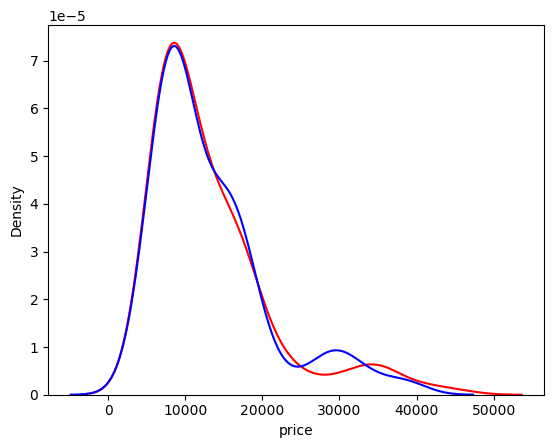

In [125]:
ax1=sns.distplot(df_data['price'], hist= False, color='r', label= ' Actual values')
sns.distplot(yhat ,hist= False, color='b', label= 'predicited value' , ax=ax1)
